# (Flights)
## by (Mahmoud Saleh)

## Preliminary Wrangling

> This dataset containing 1.3 million flights delay info for months Oct,Nov and Dec 1987.

>### Questions:
>-We have some questions about the flights especially delay of flights and i will answer these questions by the end of my analysis.
> * Are there certain destination or arrival cities that are home to more delays or cancellations?
> * is the weather have an effect on flights delays or cancellations? 
> * Are there certain months that are delays or cancellations?
> -By exploring the data we will find more questions.

### *Setting the workspace

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
base_color=sb.color_palette()

### Loading data
> The data is available for download here:
>> https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009

In [3]:
df=pd.read_csv(r"F:\FWD\Advanced\Last project\DataExpo2009\DataExpo2009\1987.csv")

### What is the structure of your dataset?

> #### Dataset volume.

In [4]:
# Exploring data shape:
df.shape

(1311826, 29)

>* we have 1311826 row which refer to the flights count, and 29 columns with data for each flight.

In [5]:
# Exploring a slice from the data:
df.head().T

,0,1,2,3,4
Year,1987,1987,1987,1987,1987
Month,10,10,10,10,10
DayofMonth,14,15,17,18,19
DayOfWeek,3,4,6,7,1
DepTime,741.0,729.0,741.0,729.0,749.0
CRSDepTime,730,730,730,730,730
ArrTime,912.0,903.0,918.0,847.0,922.0
CRSArrTime,849,849,849,849,849
UniqueCarrier,PS,PS,PS,PS,PS
FlightNum,1451,1451,1451,1451,1451


>* Colum labels are grammatically correct and I have added an explanatory source for these terms.
>> https://docs.microsoft.com/en-us/machine-learning-server/r-reference/revoscaler/airontime87to12

In [6]:
# Exploring column labels, missing values & dtypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311826 entries, 0 to 1311825
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1311826 non-null  int64  
 1   Month              1311826 non-null  int64  
 2   DayofMonth         1311826 non-null  int64  
 3   DayOfWeek          1311826 non-null  int64  
 4   DepTime            1292141 non-null  float64
 5   CRSDepTime         1311826 non-null  int64  
 6   ArrTime            1288326 non-null  float64
 7   CRSArrTime         1311826 non-null  int64  
 8   UniqueCarrier      1311826 non-null  object 
 9   FlightNum          1311826 non-null  int64  
 10  TailNum            0 non-null        float64
 11  ActualElapsedTime  1288326 non-null  float64
 12  CRSElapsedTime     1311826 non-null  int64  
 13  AirTime            0 non-null        float64
 14  ArrDelay           1288326 non-null  float64
 15  DepDelay           1292141 non-n

>* Some columns have no values, I will drop them in clear step, other columns have missing values.

> * The main features in dataset are: ArrDelay, DepDelay, Cancelled & Diverted.



> * I will use: DepTime, ArrTime, UniqueCarrier, , Origin, Dest, Month, DayofMonth, DayOfWeek. 


###  Data cleaning

In [7]:
# Searching for duplicated rows:
df.duplicated().sum()

72

>* We have 72 duplicated rows, let us drop it.

In [8]:
# Drop duplicated rows:
df.drop_duplicates(inplace=True)
# Check again after drop:
df.duplicated().sum()

0

>* Now we have no duplicated rows.

In [9]:
# Searching for empty columns:
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                19682
CRSDepTime                 0
ArrTime                23497
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum              1311754
ActualElapsedTime      23497
CRSElapsedTime             0
AirTime              1311754
ArrDelay               23497
DepDelay               19682
Origin                     0
Dest                       0
Distance                1015
TaxiIn               1311754
TaxiOut              1311754
Cancelled                  0
CancellationCode     1311754
Diverted                   0
CarrierDelay         1311754
WeatherDelay         1311754
NASDelay             1311754
SecurityDelay        1311754
LateAircraftDelay    1311754
dtype: int64

In [10]:
# Detirmine full empty columns:
df_na=[df.isna().sum()[df.isna().sum() == df.shape[0]]]

In [11]:
#drop empty columns:
df.drop(columns=['TailNum','AirTime','TaxiIn','TaxiOut','CancellationCode','CarrierDelay','WeatherDelay','NASDelay',
                 'SecurityDelay','LateAircraftDelay'], inplace=True)

In [12]:
# Exploring new data:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311754 entries, 0 to 1311825
Data columns (total 19 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1311754 non-null  int64  
 1   Month              1311754 non-null  int64  
 2   DayofMonth         1311754 non-null  int64  
 3   DayOfWeek          1311754 non-null  int64  
 4   DepTime            1292072 non-null  float64
 5   CRSDepTime         1311754 non-null  int64  
 6   ArrTime            1288257 non-null  float64
 7   CRSArrTime         1311754 non-null  int64  
 8   UniqueCarrier      1311754 non-null  object 
 9   FlightNum          1311754 non-null  int64  
 10  ActualElapsedTime  1288257 non-null  float64
 11  CRSElapsedTime     1311754 non-null  int64  
 12  ArrDelay           1288257 non-null  float64
 13  DepDelay           1292072 non-null  float64
 14  Origin             1311754 non-null  object 
 15  Dest               1311754 non-n

> * Now we have 19 columns in our dataset after we droped 10 rows which have no data.

> * let us see the missing values in these columns.

## Create new columns:
> I will create new column named "ArrDel" includes values 'Arrival on time','Arrival delay' and 'Arrival early' according to values which ArrDelay column included.
Also I will create new column named "DepDel" includes values 'Departure on time','Departure delay' and 'Departure early' according to values which DepDelay column included.

In [13]:
# ArrDel column:
df.loc[df['ArrDelay']==0,'ArrDel']='Arrival on time'
df.loc[df['ArrDelay']>0,'ArrDel']='Arrival delay'
df.loc[df['ArrDelay']<0,'ArrDel']='Arrival early'


# DepDel column:
df.loc[df['DepDelay']==0,'DepDel']='Departure on time'
df.loc[df['DepDelay']>0,'DepDel']='Departure delay'
df.loc[df['DepDelay']<0,'DepDel']='Departure early'

## Create Two dfs for arrived delay & departure delay:
> I will create df_arrdelay includes arrival delay flights, and df_depdelay includes departure delay flights.

In [14]:
# df delayed arrived:
df_arrdelay=df[df['ArrDelay']>0]
# df delayed departure:
df_depdelay=df[df['DepDelay']>0]

In [15]:
# describe the data:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1311754.0,1987.000000,0.000000,1987.0,1987.0,1987.0,1987.0,1987.0
Month,1311754.0,10.993779,0.823193,10.0,10.0,11.0,12.0,12.0
DayofMonth,1311754.0,15.717418,8.835399,1.0,8.0,16.0,23.0,31.0
DayOfWeek,1311754.0,3.949051,1.986305,1.0,2.0,4.0,6.0,7.0
DepTime,1292072.0,1369.280987,478.714175,1.0,946.0,1345.0,1750.0,2400.0
CRSDepTime,1311754.0,1361.136415,471.966200,1.0,940.0,1338.0,1742.0,2359.0
ArrTime,1288257.0,1493.157229,498.750020,1.0,1117.0,1521.0,1918.0,2400.0
CRSArrTime,1311754.0,1491.058549,486.800287,1.0,1115.0,1519.0,1912.0,2400.0
FlightNum,1311754.0,670.115894,514.530949,1.0,291.0,560.0,894.0,6282.0
ActualElapsedTime,1288257.0,102.180968,61.826394,-515.0,60.0,83.0,129.0,1654.0


>### From describe data in previous step we found some missing values in columns let’s show it:

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


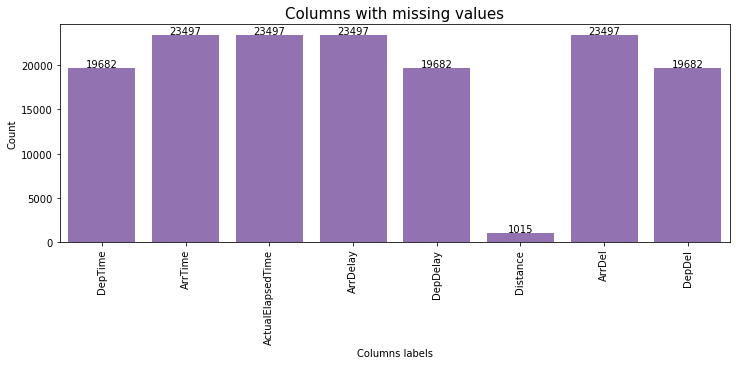

In [16]:
# Counting missing values in each column:
cols_na=df.isna().sum()[df.isna().sum() != 0]
# Plotting missing values in each column:
plt.figure(figsize = [12,4])
sb.barplot(cols_na.index.values, cols_na,color=base_color[4]);
plt.xticks(rotation=90) 
for i in range (cols_na.shape[0]):
    count = cols_na[i]
    plt.text(i, count+1000, count, ha = 'center', va='top')
plt.title('Columns with missing values',size=15)
plt.xlabel('Columns labels', rotation=0);
plt.ylabel('Count', rotation=90);

## Univariate Exploration


### * When  I display destination and original item in next plots I will show only  top 30 values.

# # Cancelled flights:

> ### * Display cancelled flights for each carrier:

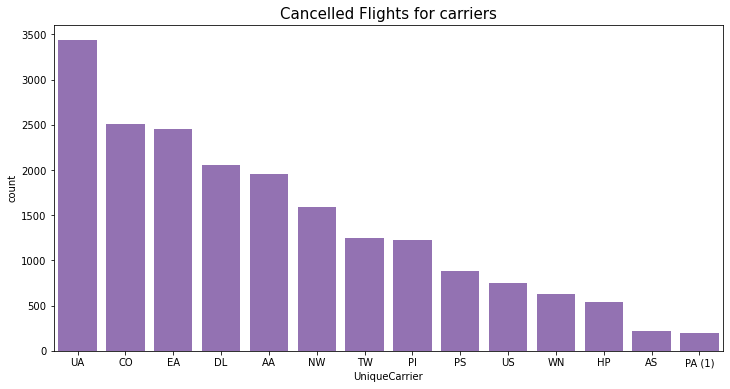

In [17]:
# df for cancelled flights:
df_cnl=df[df['Cancelled']==1]
# Plotting them for each carrier:
plt.figure(figsize = [12,6])
uc_order=df_cnl['UniqueCarrier'].value_counts().index
sb.countplot(data = df_cnl, x = 'UniqueCarrier',color=base_color[4],order=uc_order)
plt.xticks(rotation=0);
df.groupby('UniqueCarrier')['Cancelled'].count()
plt.title('Cancelled Flights for carriers',size=15);

>### * high carrier with cancelled flights is <a style="color:blue"> " UA, CO, EA, DL, AA & NW "</a> and the rest as shown above.

> * ### Top 30 destinations have Cancelled Flights.

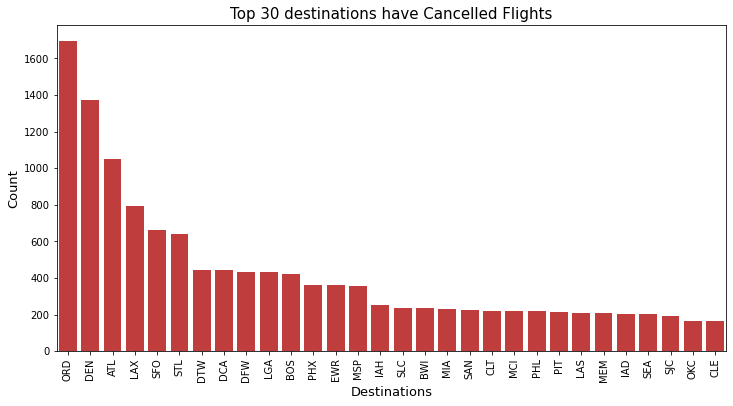

In [18]:
# Plotting them for each destination:
plt.figure(figsize = [12,6])
de_order=df_cnl['Dest'].value_counts().index
sb.countplot(data = df_cnl, x = 'Dest',color=base_color[3],order=de_order)
plt.title('Top 30 destinations have Cancelled Flights',size=15)
plt.xlim((-0.5,29.5))
plt.xlabel("Destinations",size=13)
plt.ylabel("Count",size=13)
plt.xticks(rotation=90);

>### * The worst destinations which have more cancellation flights are <a style="color:blue"> " ORD, DEN, ATL, LAX, SFO & STL "</a>  and the rest as shown above.

> ### * Top 30 original city have Cancelled Flights.

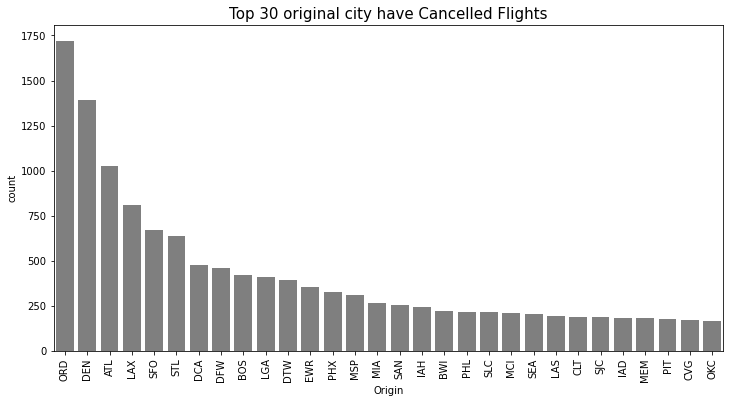

In [19]:
# Plotting them for each origin:
plt.figure(figsize = [12,6])
o_order=df_cnl['Origin'].value_counts().index
sb.countplot(data = df_cnl, x = 'Origin',color=base_color[7],order=o_order)
plt.xticks(rotation=0);
plt.title('Top 30 original city have Cancelled Flights',size=15)
plt.xlim(-0.5,29.5);
plt.xticks(rotation=90);

>### * The worst original cities which have more cancellation flights are <a style="color:blue"> " ORD, DEN, ATL, LAX, SFO & STL "</a> they the .

# # Delayed arrival Flights:

> ### * Display delayed arrival flights for each carrier:

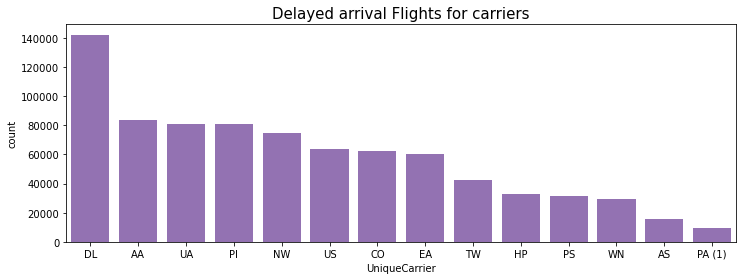

In [20]:
# Plotting for each carrier:
plt.figure(figsize = [12,4])
uc_order=df_arrdelay['UniqueCarrier'].value_counts().index

sb.countplot(data = df_arrdelay, x = 'UniqueCarrier',color=base_color[4],order=uc_order)
plt.xticks(rotation=0);
plt.title('Delayed arrival Flights for carriers',size=15);

> ### * The worst Carriers which have high rate for delayed arrival flights are <a style="color:blue"> "DL, AA, UA, PI, NW & US "</a>.

> * ### Top 30 destinations have Delayed arrival Flights.

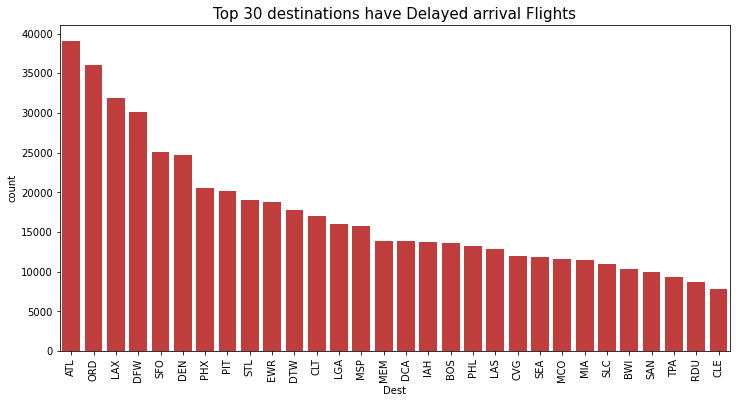

In [21]:
# Plotting:
plt.figure(figsize = [12,6])
de_order=df_arrdelay['Dest'].value_counts().index
sb.countplot(data = df_arrdelay, x = 'Dest',color=base_color[3],order=de_order)
plt.xticks(rotation=0);
plt.title('Top 30 destinations have Delayed arrival Flights',size=15)
plt.xlim((-0.5,29.5));
plt.xticks(rotation=90);

> ### * The worst destinations which have high rate for Diverted flights are <a style="color:blue"> " ATL, ORD, LAX, DFW, SFO & DEN "</a> and the rest as shown above.

> ### * Top 30 original city have Delayed arrival Flights.

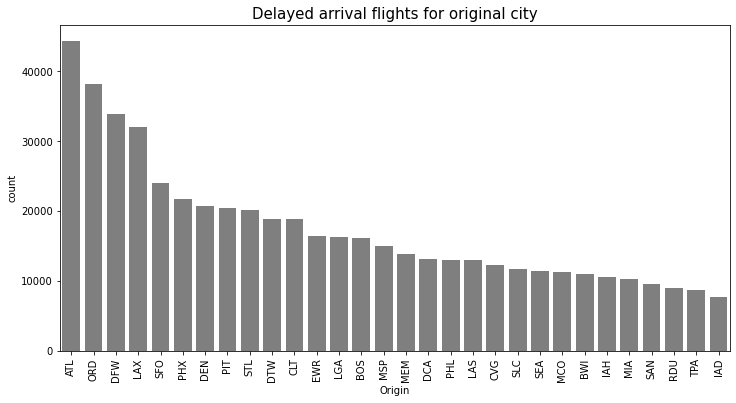

In [22]:
plt.figure(figsize = [12,6])
de_order=df_arrdelay['Origin'].value_counts().index
sb.countplot(data = df_arrdelay, x = 'Origin',color=base_color[7],order=de_order)
plt.xticks(rotation=0);
plt.title('Delayed arrival flights for original city',size=15)
plt.xlim((-0.5,29.5));
plt.xticks(rotation=90);

> ### * The worst original city which have high rate for Delayed arrival flight are <a style="color:blue"> " ATL, ORD, DFW, LAX, SFO & PHX "</a> and the rest as shown above.

# # Delayed departure Flights:

> ### * Display delayed departure Flights for each carrier:

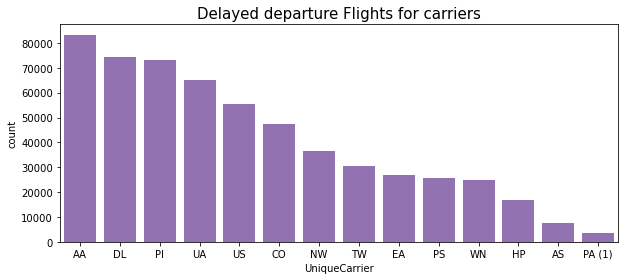

In [23]:
# Plotting for each carrier:
plt.figure(figsize = [10,4])
de_order=df_depdelay['UniqueCarrier'].value_counts().index

sb.countplot(data = df_depdelay, x = 'UniqueCarrier',color=base_color[4],order=de_order)
plt.xticks(rotation=0)
plt.title('Delayed departure Flights for carriers',size=15);

> ### * The worst Carriers which have high rate for Delayed departure Flights are <a style="color:blue"> "AA, DL, PI, UA, US & CO "</a>.

> * ### Top 30 destinations have Delayed departure Flights.

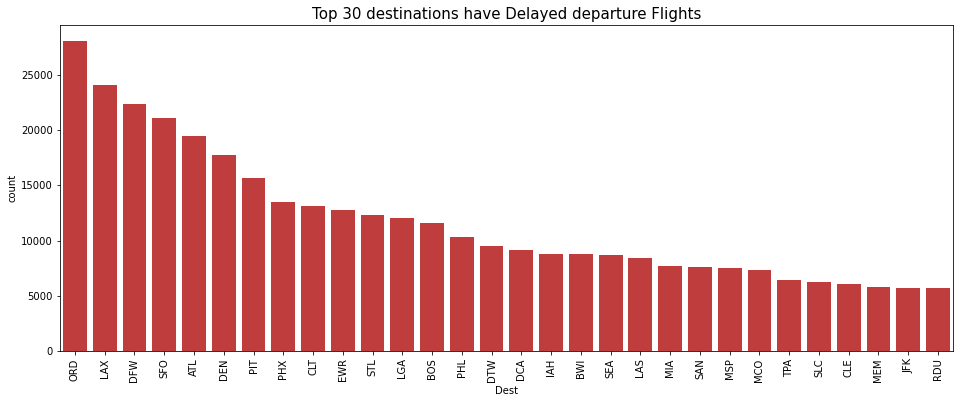

In [24]:
plt.figure(figsize = [16,6])
de_order=df_depdelay['Dest'].value_counts().index
sb.countplot(data = df_depdelay, x = 'Dest',color=base_color[3],order=de_order)
plt.xticks(rotation=0);
plt.title('Top 30 destinations have Delayed departure Flights',size=15)
plt.xlim(-0.5,29.50);
plt.xticks(rotation=90);

> ### * The worst destinations which have high Delayed departure flight are <a style="color:blue"> " ORD, LAX, DFW, SFO,ATL & DEN "</a>.

> * ### Top 30 original city have Delayed departure Flights.

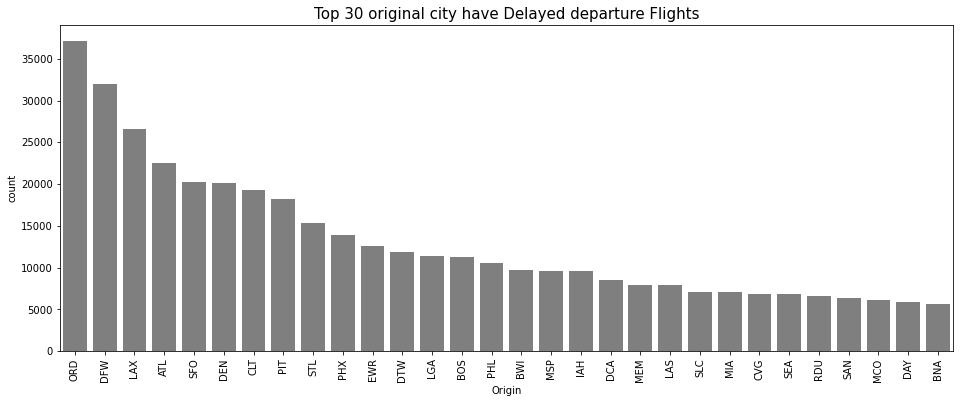

In [25]:
plt.figure(figsize = [16,6])
o_order=df_depdelay['Origin'].value_counts().index
sb.countplot(data = df_depdelay, x = 'Origin',color=base_color[7],order=o_order)
plt.xticks(rotation=0);
plt.title('Top 30 original city have Delayed departure Flights',size=15)
plt.xlim(-0.5,29.50);
plt.xticks(rotation=90);

> ### * The worst original city which have high Delayed departure flight are <a style="color:blue"> " ORD, DFW, LAX, ATL, SFO & DEN "</a>.

# * Display the other items in the data:

> ### *  I begin with item month,let’s see How many flights in each month.

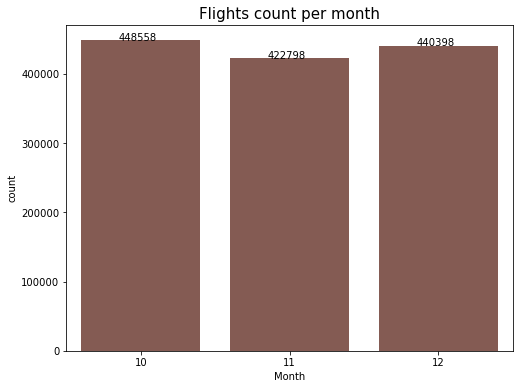

In [26]:
plt.figure(figsize = [8,6])

ax=sb.countplot(data=df,x='Month',color=base_color[5]);
plt.title('Flights count per month',size=15);
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+.25,p.get_height()+50))

> * The number of trips for the months is approximately equal.

> ### * Then, let’s see cancelled flights for each month.

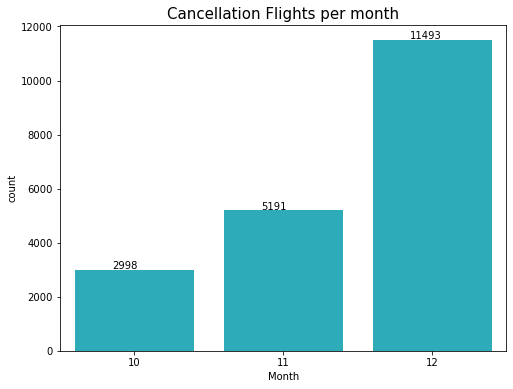

In [27]:
plt.figure(figsize = [8,6])
ax=sb.countplot(data = df_cnl, x = 'Month',color=base_color[9])
plt.title('Cancellation Flights per month',size=15);
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+.25,
                                                 p.get_height()+50))
    

> * December has the biggest number for cancelled flights by 11493 flights,then November by 5191 flights and last is October by 2995 flights.

> * Display arrival delay Flights per month.

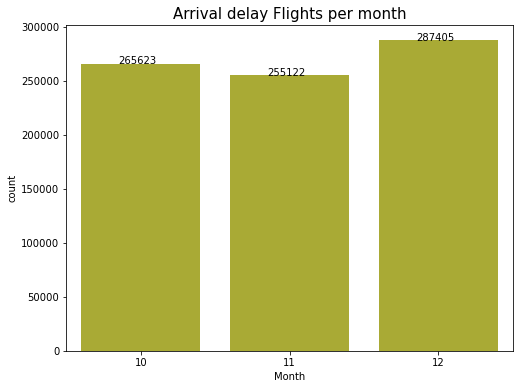

In [28]:
plt.figure(figsize = [8,6])
ax=sb.countplot(data = df_arrdelay, x = 'Month',color=base_color[8])
plt.title('Arrival delay Flights per month',size=15);
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+.25,
                                                 p.get_height()+50))

> * December has the biggest number for arrival delayed flights by 287405 flights,then October by 265623 flights and last is November by 255122 flights.

> * Display departure delay Flights per month.

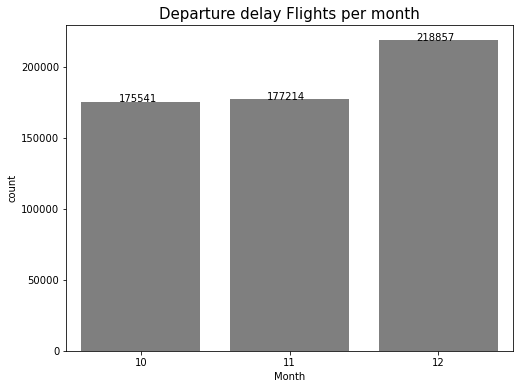

In [29]:
plt.figure(figsize = [8,6])
ax=sb.countplot(data = df_depdelay, x = 'Month',color=base_color[7])
plt.title('Departure delay Flights per month',size=15);
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+.25,
                                                 p.get_height()+50))

> * December has the biggest number for departure delayed flights by 218857 flights,then November by 177214 flights and last is October by 175541 flights.

> ### * Display flights by day of week.

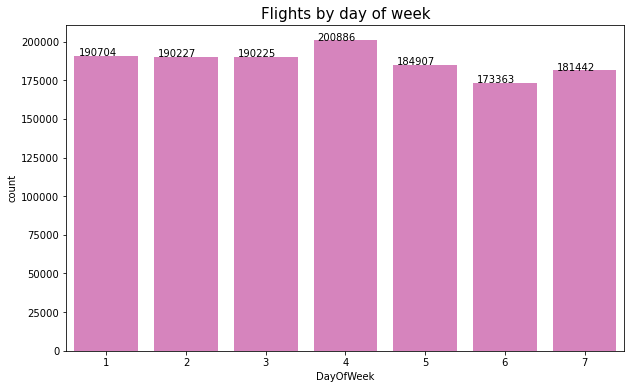

In [30]:
# Flights in weekday
plt.figure(figsize = [10,6])
dw_order=df['DayOfWeek'].value_counts().index
# Plotting..... 
ax=sb.countplot(data= df,x= 'DayOfWeek',color= base_color[6])
plt.title('Flights by day of week',size=15);
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+.05,
                                                 p.get_height()+50))

> The fourth day has the biggest number of flights with 200886 flights, and the smallest count is 173363 for the sixth day.

>### * show flights for each day in month:

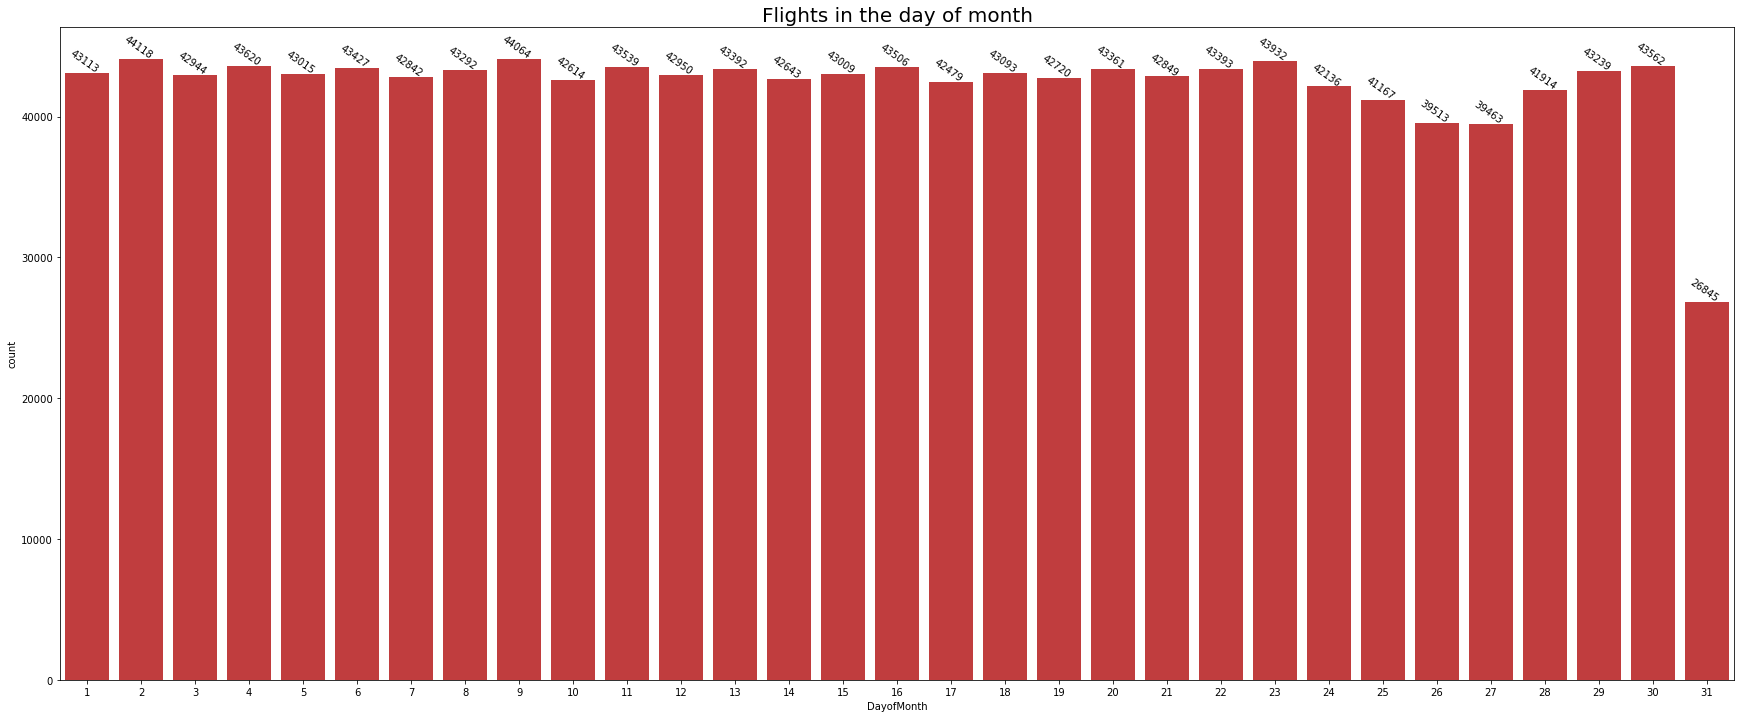

In [31]:
plt.figure(figsize = [30,12])
dm_order=df['DayofMonth'].value_counts().index

ax=sb.countplot(data=df,x='DayofMonth',color=base_color[3])
plt.title('Flights in the day of month',size=20);
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.05,
                                                 p.get_height()+50),rotation=-35)

## * Diaplay the Frequency of flights for each arrival time.

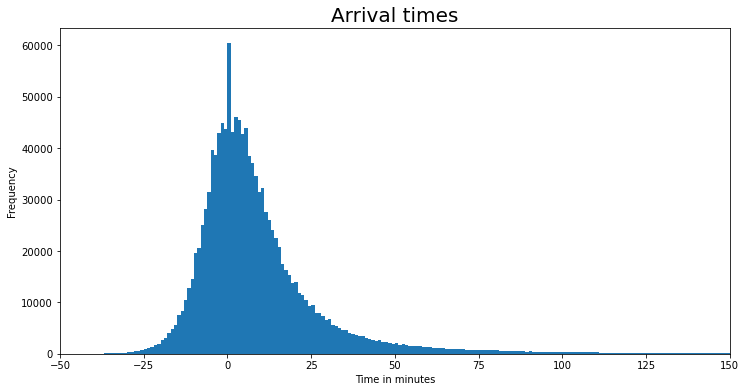

In [32]:
# Now we see histogram for arrival times:
plt.figure(figsize = [12,6])
bins = np.arange(-50,df['ArrDelay'].max()+1,1)
plt.hist(data=df, x='ArrDelay',bins=bins);
plt.xlim(-50,150)
plt.title('Arrival times',size=20)
plt.xlabel('Time in minutes')
plt.ylabel('Frequency');

> ### * The point here is that, flighs arrived on time is only 60K flights, and it is the biggest frequency for arrival.

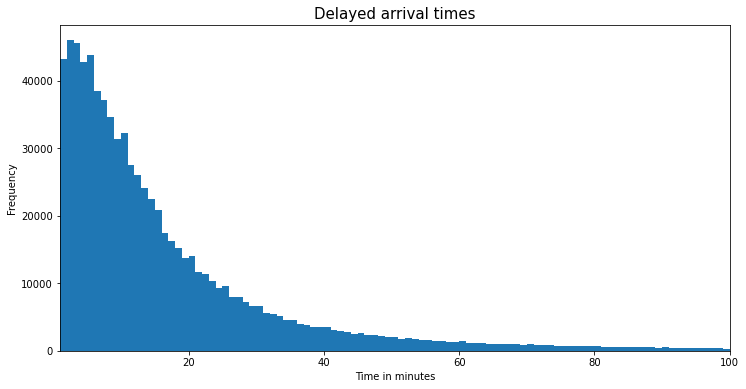

In [33]:
# Display histogram for delayed arrival flights:
plt.figure(figsize = [12,6])
bins = np.arange(1,df_arrdelay['ArrDelay'].max()+1,1)
plt.hist(data=df_arrdelay, x='ArrDelay',bins=bins);
plt.xlim(1,100)
plt.xlabel('Time in minutes')
plt.ylabel('Frequency');
plt.title('Delayed arrival times',size=15);

>* #### As shown above the most delayed time for arrival flights is between 1:50 minutes.

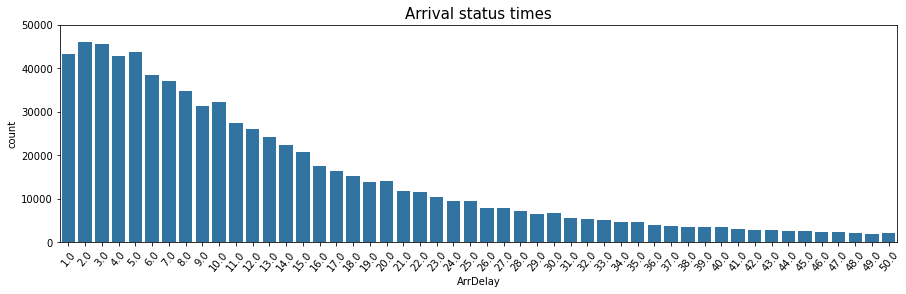

In [34]:
# I used df_arrdelay not df, so I can show only time for arrival delay.
plt.figure(figsize = [15,4])
sb.countplot(data= df_arrdelay,x= 'ArrDelay',color= base_color[0]);
plt.xticks(rotation=50)
plt.title('Arrival status times',size=15);
plt.xlim(-.5,49.5)
plt.ylim(0,50000);

## * Diaplay the Frequency of flights for each departure time.

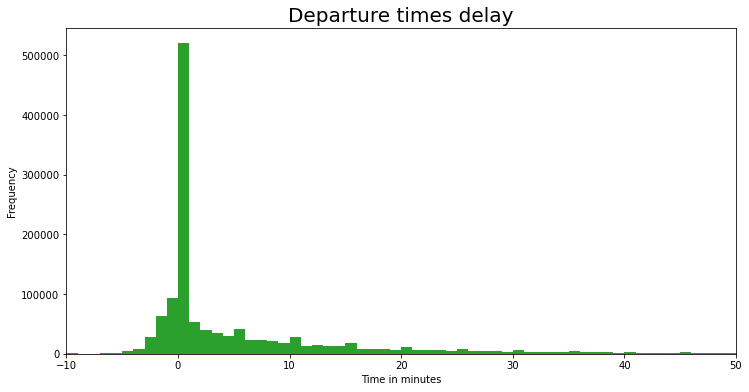

In [35]:
# Histogram for Departure times delay:
plt.figure(figsize = [12,6])
bins = np.arange(-50,df['DepDelay'].max()+1,1)
plt.hist(data=df, x='DepDelay',bins=bins,color= base_color[2]);
plt.xlim(-10,50);
plt.title('Departure times delay',size=20)
plt.xlabel('Time in minutes')
plt.ylabel('Frequency');

> ### * The departure flights on time is more than 500K

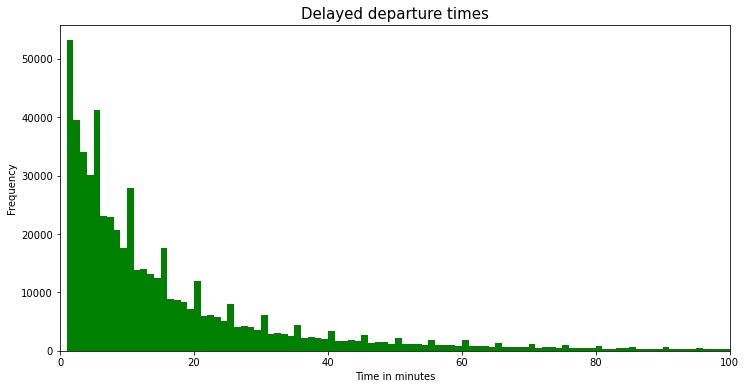

In [36]:
# Now we see histogram for delayed departure flights:
plt.figure(figsize = [12,6])
bins = np.arange(1,df_depdelay['DepDelay'].max()+1,1)
plt.hist(data=df_depdelay, x='DepDelay',bins=bins,color='g');
plt.xlim(0,100);
plt.xlabel('Time in minutes')
plt.ylabel('Frequency');
plt.title('Delayed departure times',size=15);

>* #### Also with the most delayed time for departure flights is between 1:50 minutes.
>* #### As is clear from the two histograms, the frequency of delay arrival is is more than delay depature.

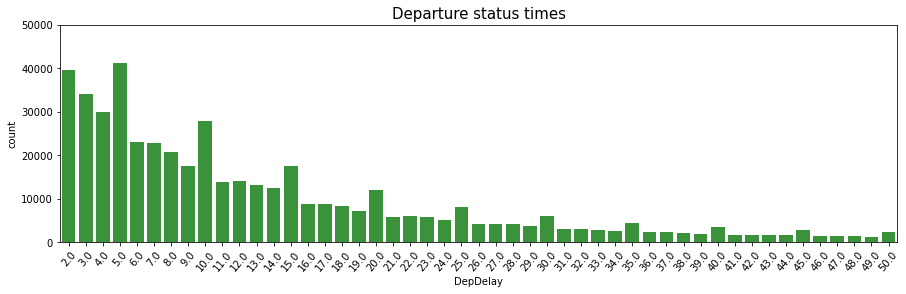

In [37]:
plt.figure(figsize = [15,4])
#dd_order=df_depdelay['DepDelay'].value_counts().index
sb.countplot(data= df_depdelay,x= 'DepDelay',color= base_color[2]);
plt.xticks(rotation=50)
plt.title('Departure status times',size=15);
plt.xlim(0.5,49.5)
plt.ylim(0,50000);

## Arrival Time:

> ### Display arrival time for all flights.

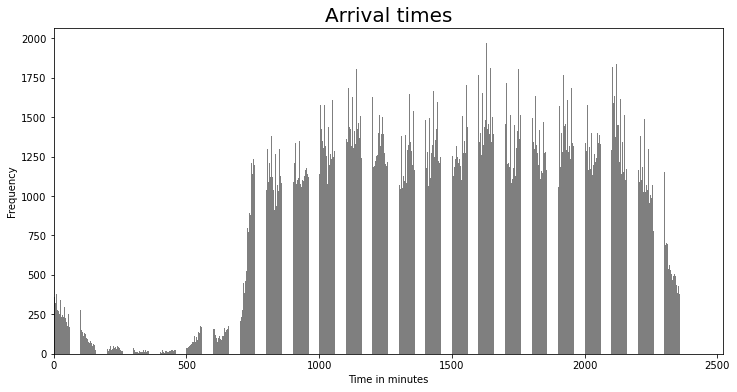

In [38]:
plt.figure(figsize = [12,6])
bins = np.arange(-50,df['ArrTime'].max()+1,1)
plt.hist(data=df, x='ArrTime',bins=bins,color= base_color[7]);
plt.title('Arrival times',size=20)
plt.xlabel('Time in minutes')
plt.ylabel('Frequency');
plt.xlim(0,);

> ### Display delayed arrival times.

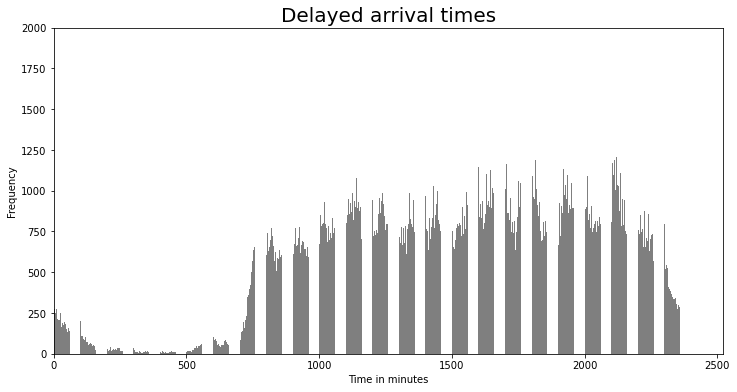

In [39]:
plt.figure(figsize = [12,6])
bins = np.arange(-50,df_arrdelay['ArrTime'].max()+1,1)
plt.hist(data=df_arrdelay, x='ArrTime',bins=bins,color= base_color[7]);
plt.title('Delayed arrival times',size=20)
plt.xlabel('Time in minutes')
plt.ylabel('Frequency')
plt.xlim(0,)
plt.ylim(0,2000);

> ### There is no specific time that causes the delay, the delay arrival time is located on each map at the time of arrival. 

> ### Display departure time for all flights.

# Departure Time:
> ### Display departure time for all flights.

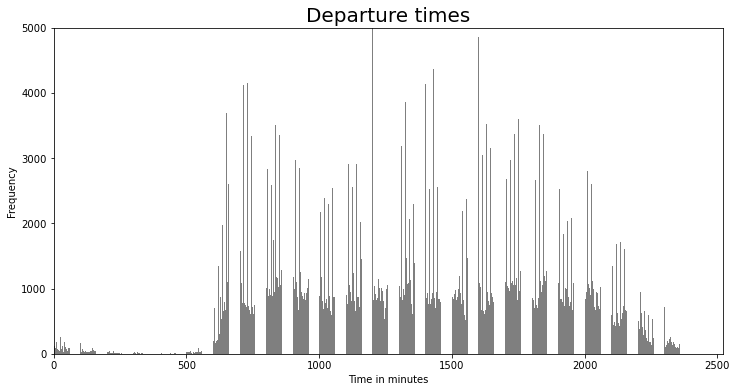

In [40]:
plt.figure(figsize = [12,6])
bins = np.arange(-50,df['DepTime'].max()+1,1)
plt.hist(data=df, x='DepTime',bins=bins,color= base_color[7]);
plt.title('Departure times',size=20)
plt.xlabel('Time in minutes')
plt.ylabel('Frequency');
plt.xlim(0,)
plt.ylim(0,5000);

> ### Display delayed departure times.

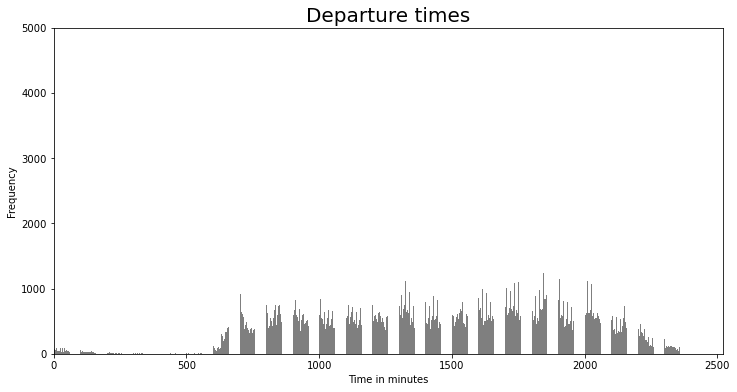

In [41]:
plt.figure(figsize = [12,6])
bins = np.arange(-50,df_depdelay['DepTime'].max()+1,1)
plt.hist(data=df_depdelay, x='DepTime',bins=bins,color= base_color[7]);
plt.title('Departure times',size=20)
plt.xlabel('Time in minutes')
plt.ylabel('Frequency')
plt.xlim(0,)
plt.ylim(0,5000);

> ### The same as delayed arrival times, no specific time that causes the delay.

# Distance:

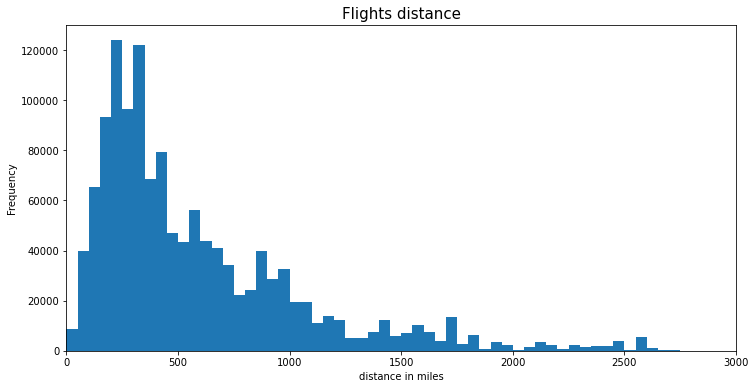

In [42]:
plt.figure(figsize = [12,6])
bins = np.arange(0,df['Distance'].max()+50,50)
plt.hist(data=df, x='Distance',bins=bins);
plt.xlim(0,3000);
plt.xlabel('distance in miles')
plt.ylabel('Frequency');
plt.title('Flights distance',size=15);

# Delayed departure distance:

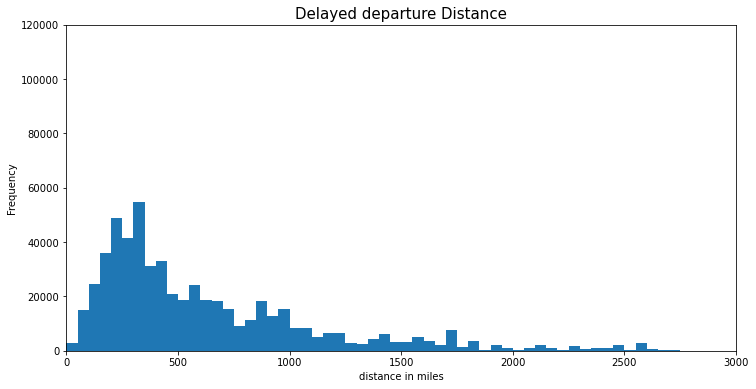

In [43]:
plt.figure(figsize = [12,6])
bins = np.arange(0,df_depdelay['Distance'].max()+50,50)
plt.hist(data=df_depdelay, x='Distance',bins=bins);
plt.xlim(0,3000)
plt.ylim(0,120000)
plt.xlabel('distance in miles')
plt.ylabel('Frequency');
plt.title('Delayed departure Distance',size=15);

# Delayed arrival distance:

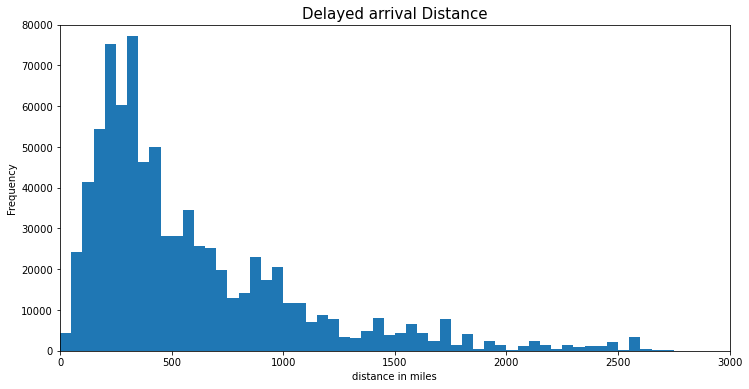

In [44]:
plt.figure(figsize = [12,6])
bins = np.arange(0,df_arrdelay['Distance'].max()+50,50)
plt.hist(data=df_arrdelay, x='Distance',bins=bins);
plt.xlim(0,3000)
plt.ylim(0,80000)
plt.xlabel('distance in miles')
plt.ylabel('Frequency');
plt.title('Delayed arrival Distance',size=15);

> * As it shown no specific distance causes the arrival delay or departure delay.


## * Percentage of arrival status flights.

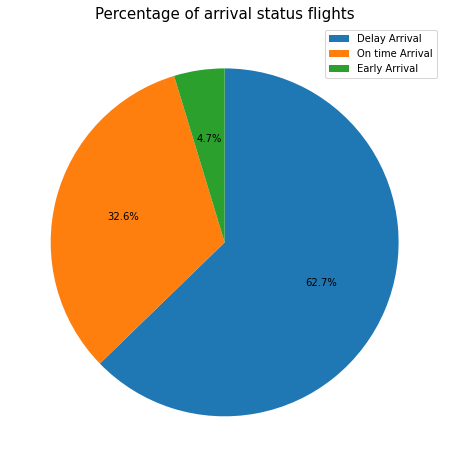

In [45]:
# Plotting Percentage of arrival status flights:
plt.figure(figsize = [10,8])

arrdel_c=df['ArrDel'].value_counts()
plt.pie(arrdel_c, startangle = 90, counterclock = False,autopct = '%0.1f%%');
plt.title('Percentage of arrival status flights',size=15);
plt.legend(labels = ['Delay Arrival','On time Arrival','Early Arrival'],loc='upper right');

## * Percentage of departure status flights.

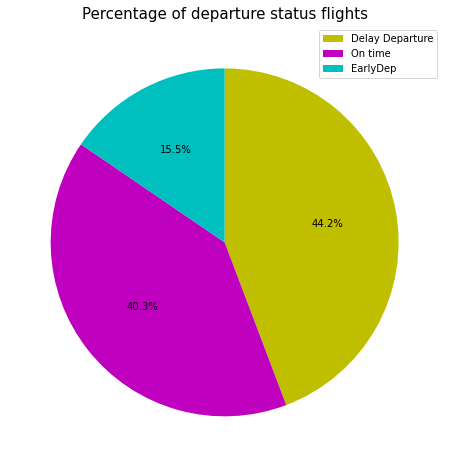

In [46]:
# Plotting
plt.figure(figsize = [10,8])
colors = ['y','m','c']
depdel_c=df['DepDel'].value_counts()
plt.pie(depdel_c, startangle = 90, counterclock = False,autopct = '%0.1f%%',colors=colors);
plt.title('Percentage of departure status flights',size=15);
plt.legend(labels = ['Delay Departure','On time','EarlyDep'],loc='upper right');

## * Percentage of operated & cancelled flights.

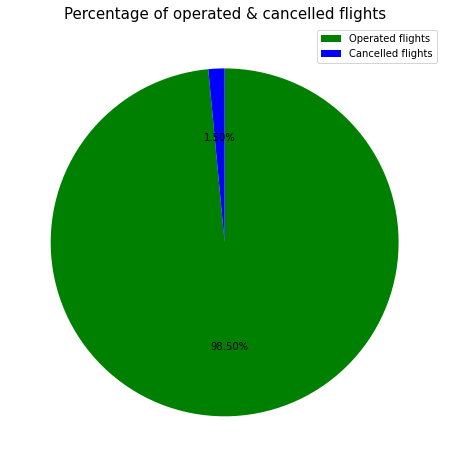

In [47]:
# Plotting Percentage of operated & cancelled flights:
plt.figure(figsize = [10,8])
colors = ['g','b']
sorted_c=df['Cancelled'].value_counts()
plt.pie(sorted_c, startangle = 90, counterclock = False,autopct = '%0.2f%%',colors=colors);
plt.title('Percentage of operated & cancelled flights',size=15);
plt.legend(labels = ['Operated flights','Cancelled flights']);

## * Percentage of diverted flights.

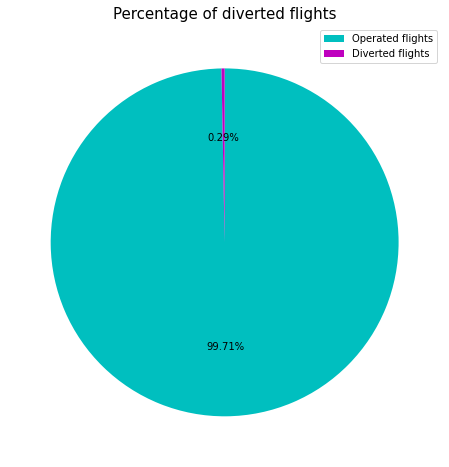

In [48]:
# Plotting Percentage of diverted flights:
plt.figure(figsize = [10,8])
colors = ['c','m']
sorted_d=df['Diverted'].value_counts()
plt.pie(sorted_d, startangle = 90, counterclock = False,autopct = '%0.2f%%',colors=colors);
plt.title('Percentage of diverted flights',size=15);
plt.legend( labels = ['Operated flights','Diverted flights']);

## Findings:

> ### <p style="color:green"> * Here I have the ansrwer for one of the analysis questions that,there is certain month has the high count of cancelled and delayed flights as we see it's December.
> ### <p style="color:green"> * Answring for question about the wether we can say that maybe this cancellation and delay in December because of wether but we can't certain that as no wether data avilable -column for wether delay is empty column.
> ### <p style="color:green"> After looking at each of the above, it becomes clear the relationship of delay with the carrier, as there is a group of carriers in which a large proportion of the delay in arrival and departure is concentrated.
> ### <p style="color:green"> As well as the destination and arrival cities, the delayed flights are concentrated to certain destinations and arrival cities, as previously explained by the delay and destination plot and the delay and arrival cities plot.



## Bivariate Exploration

### <p style="color:blue"> As I found some relationships in the previous part,between unique carrier and delay in arrival or departure, so I will study it in more detail.

> ### * Let's display arrival delay with unique carrier.

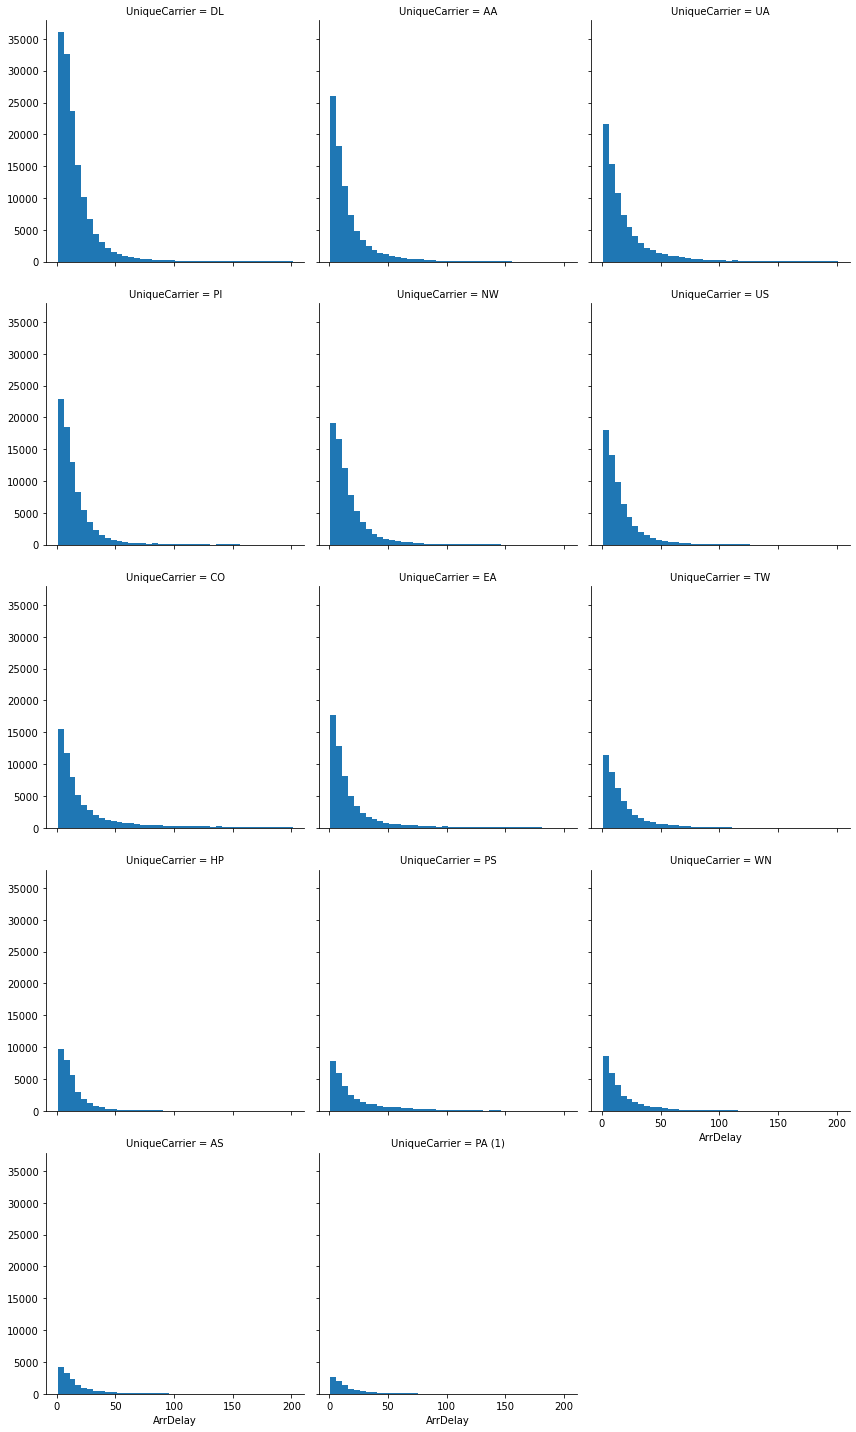

In [49]:
group_carrier = df_arrdelay.groupby(['UniqueCarrier']).count()
group_order = group_carrier.sort_values(['ArrDelay'], ascending = False).index
g = sb.FacetGrid(data = df_arrdelay, col = 'UniqueCarrier', col_wrap = 3, height = 4,
                 col_order = group_order)
g.map(plt.hist, 'ArrDelay', bins = np.arange(1,200+5,5));

> ### <p style="color:green"> * It appears from the previous figure that most of the delay in arrival is within fifty minutes. The figure also shows the companies that receive the most flights with a late arrival time, which appear in the first figure.
> ### <p style="color:green"> * We can see this digitally in the next figure, where the carrier show the number of delay arrival flights, which arrived on time, and which arrived before their time.

In [50]:
uniquecarrier_classes = ['DL', 'AA', 'UA', 'PI', 'NW','US','CO','EA','TW','HP','PS','WN','AS','PA(1)']
uniquecarrier = pd.api.types.CategoricalDtype(ordered=True, categories=uniquecarrier_classes)
df['UniqueCarrier'] = df['UniqueCarrier'].astype(uniquecarrier);

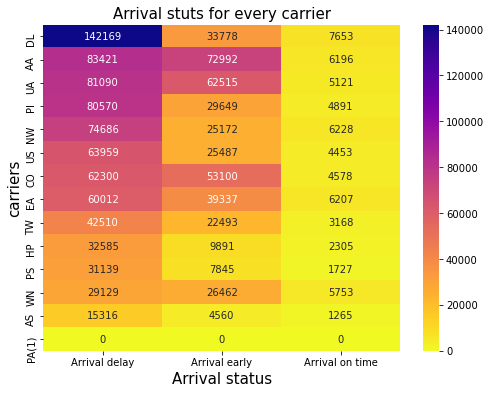

In [51]:
plt.figure(figsize = [8,6])
ad_counts = df.groupby(['ArrDel','UniqueCarrier']).size()
ad_counts = ad_counts.reset_index(name='count')
ad_counts = ad_counts.pivot(index = 'UniqueCarrier', columns = 'ArrDel', values = 'count')
sb.heatmap(ad_counts,annot = True, fmt = 'd',cmap='plasma_r')
plt.title('Arrival stuts for every carrier',size=15)
plt.ylabel('carriers',size=15);
plt.xlabel('Arrival status',size=15);

> ### <p style="color:green"> * A final clarification of this observation is as follows.

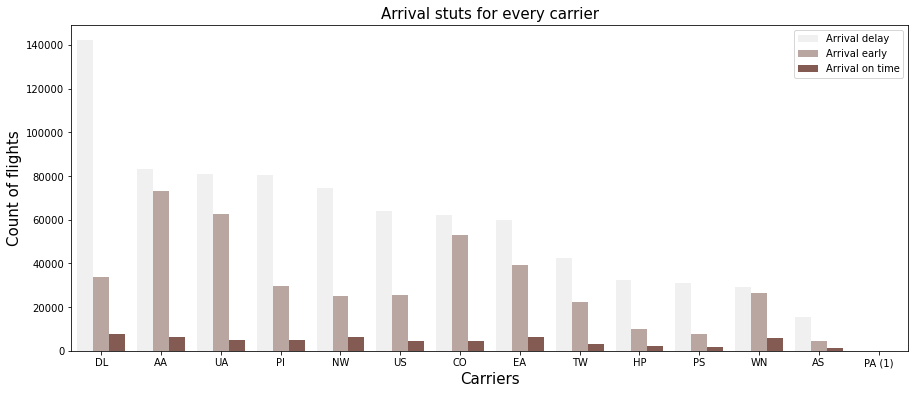

In [52]:
plt.figure(figsize = [15,6])
uc_order=df_arrdelay['UniqueCarrier'].value_counts().index
ax=sb.countplot(data= df,x= 'UniqueCarrier',hue= 'ArrDel',color= base_color[5],order=uc_order)
plt.title('Arrival stuts for every carrier',size=15)
plt.xlabel('Carriers',size=15)
plt.ylabel('Count of flights',size=15)
plt.legend(loc='upper right');

> ### <p style="color:green"> * This confirms what we have reached from the preliminary analysis, which showed that the flights delays in arrival are concentrated in a few carriers, which are at the top of the list, as we have seen.

> ### Let's check Departure delay with unique carrier.

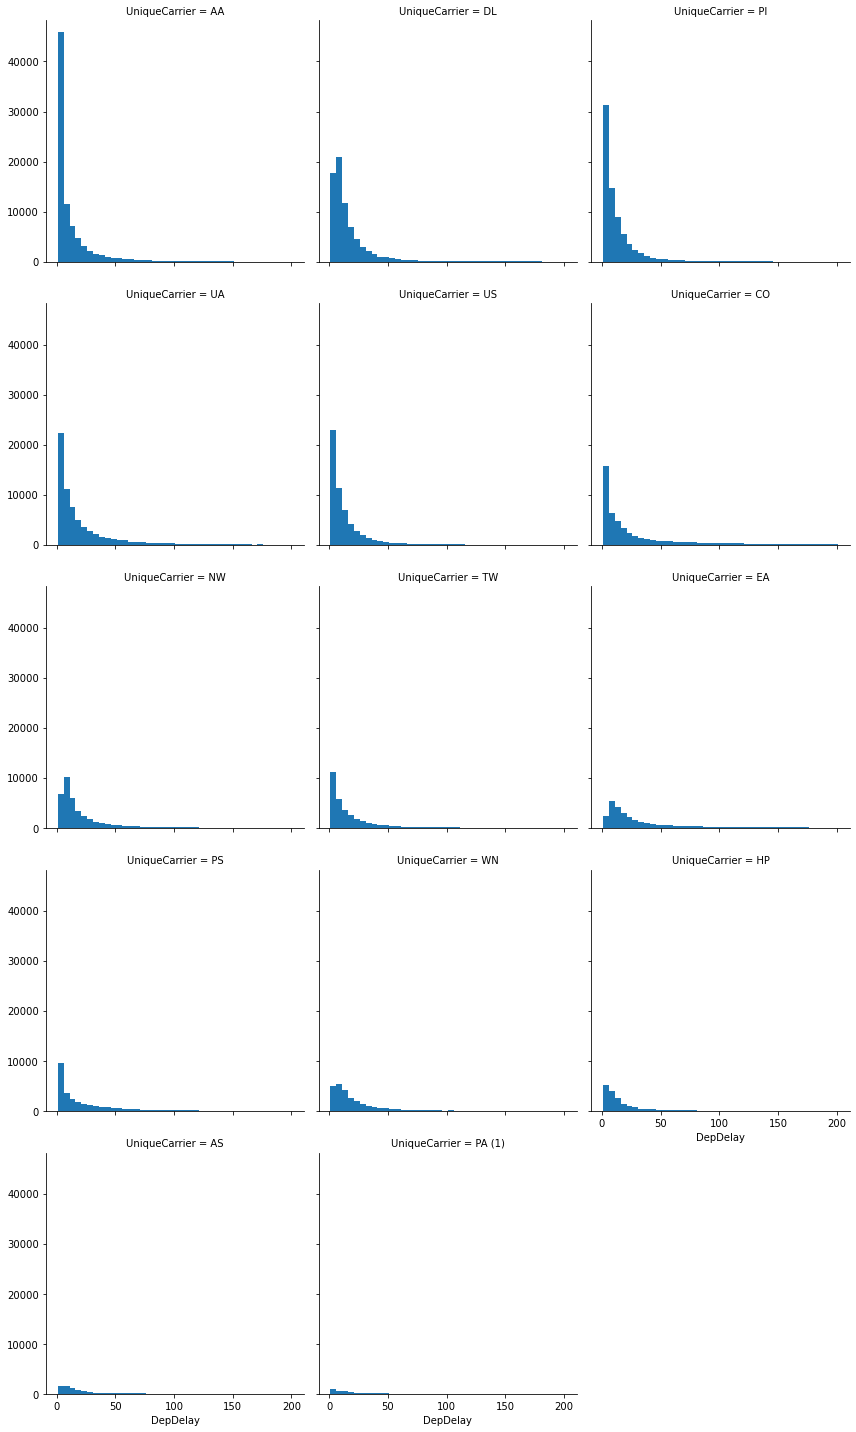

In [53]:
group_carrier2 = df_depdelay.groupby(['UniqueCarrier']).count()
group_order2 = group_carrier2.sort_values(['DepDelay'], ascending = False).index
g = sb.FacetGrid(data = df_depdelay, col = 'UniqueCarrier', col_wrap = 3, height = 4,
                 col_order = group_order2)
g.map(plt.hist, 'DepDelay', bins = np.arange(1,200+5,5));

In [54]:
uniquecarrier_classes = ['AA', 'DL', 'PI', 'UA', 'US','CO','NW','EA','PS','WN','HP','AS','PA(1)']
uniquecarrier = pd.api.types.CategoricalDtype(ordered=True, categories=uniquecarrier_classes)
df['UniqueCarrier'] = df['UniqueCarrier'].astype(uniquecarrier);

### An indication of the number of flights per carrier at departure.

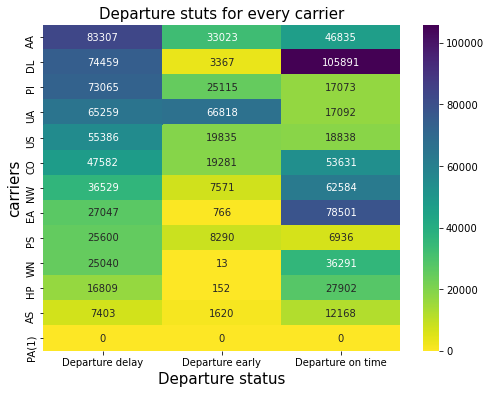

In [55]:
plt.figure(figsize = [8,6])
ad_counts = df.groupby(['DepDel','UniqueCarrier']).size()
ad_counts = ad_counts.reset_index(name='count')
ad_counts = ad_counts.pivot(index = 'UniqueCarrier', columns = 'DepDel', values = 'count')
sb.heatmap(ad_counts,annot = True, fmt = 'd',cmap='viridis_r',)
plt.title('Departure stuts for every carrier',size=15)
plt.ylabel('carriers',size=15)
plt.xlabel('Departure status',size=15);

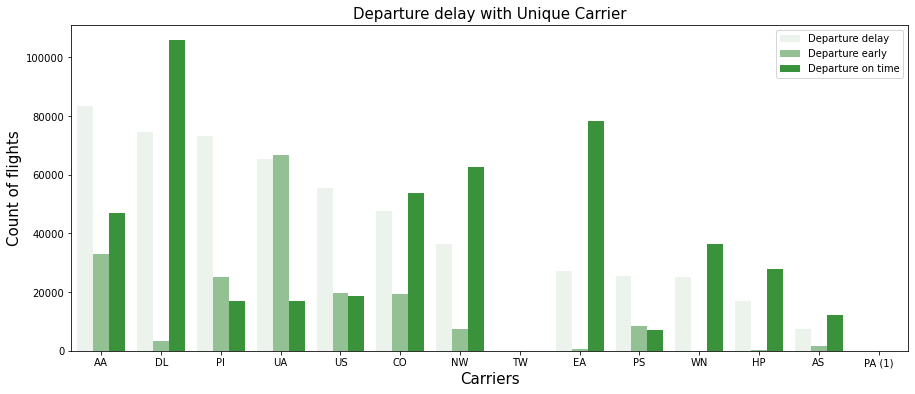

In [56]:
plt.figure(figsize = [15,6])
uc_order=df_depdelay['UniqueCarrier'].value_counts().index
sb.countplot(data= df,x= 'UniqueCarrier',hue= 'DepDel',color= base_color[2],order=uc_order);
plt.title('Departure delay with Unique Carrier',size=15)
plt.legend(loc='upper right');
plt.xlabel('Carriers',size=15)
plt.ylabel('Count of flights',size=15)
plt.legend(loc='upper right');

> ## * Arrival delay with Original city.

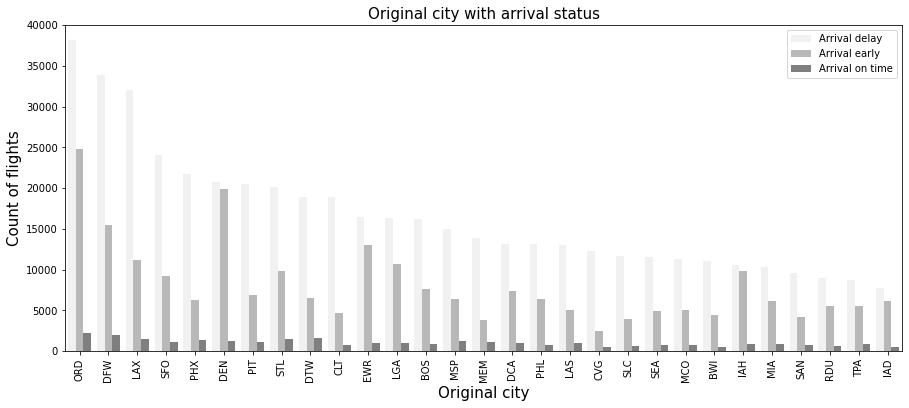

In [57]:
plt.figure(figsize = [15,6])
or_order=df_arrdelay['Origin'].value_counts().index
sb.countplot(data= df,x= 'Origin',hue= 'ArrDel',color= base_color[7],order=or_order);
plt.legend(loc='upper right');
plt.xticks(rotation=90)
plt.title('Original city with arrival status',size=15);
plt.xlabel('Original city',size=15)
plt.ylabel('Count of flights',size=15)
plt.xlim(0.5,29.5)
plt.ylim(0,40000);

> ## * Departure delay with Original city.

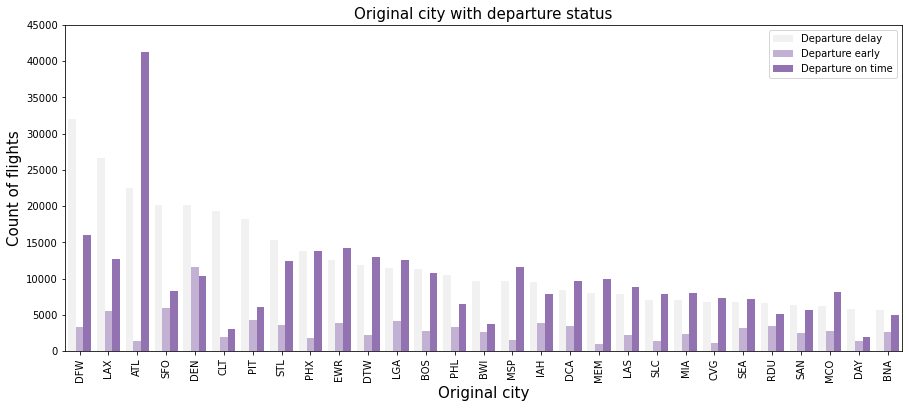

In [58]:
plt.figure(figsize = [15,6])

or_order=df_depdelay['Origin'].value_counts().index
sb.countplot(data= df,x= 'Origin',hue= 'DepDel',color= base_color[4],order=or_order);
plt.legend(loc='upper right');
plt.xticks(rotation=90)
plt.title('Original city with departure status',size=15);
plt.xlabel('Original city',size=15)
plt.ylabel('Count of flights',size=15)
plt.xlim(0.5,29.5)
plt.ylim(0,45000);

> ## * Departure delay with Destenation.

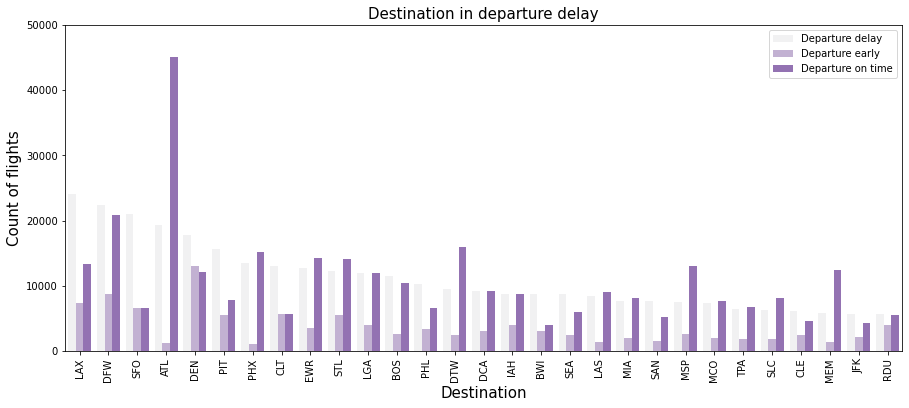

In [59]:
plt.figure(figsize = [15,6])
or_order=df_depdelay['Dest'].value_counts().index
sb.countplot(data= df,x= 'Dest',hue= 'DepDel',color= base_color[4],order=or_order);
plt.xticks(rotation=90),plt.title('Destination in departure delay',size=15)
plt.xlabel('Destination',size=15),plt.ylabel('Count of flights',size=15),plt.xlim(0.5,29.5)
plt.ylim(0,50000),plt.legend(loc='upper right');

## Multivariate Exploration

## * Create Two data frame by high delayed Destinations for arrival and departure.

In [60]:
newarrdelay=df_arrdelay.loc[df_arrdelay['Dest'].isin(['ATL', 'ORD', 'LAX','DFW','SFO','DEN','PHX','PIT','STL','EWR','DTW','CLT','LGA','MSP'])]

newdepdelay=df_depdelay.loc[df_depdelay['Dest'].isin(['ORD', 'LAX', 'DFW','SFO','ATL','DEN','PIT','PHX','CLT','EWR','STL','LGA','BOS','PHL'])]

> ### * Plotting Destinations for every carrier with delayed arrival.

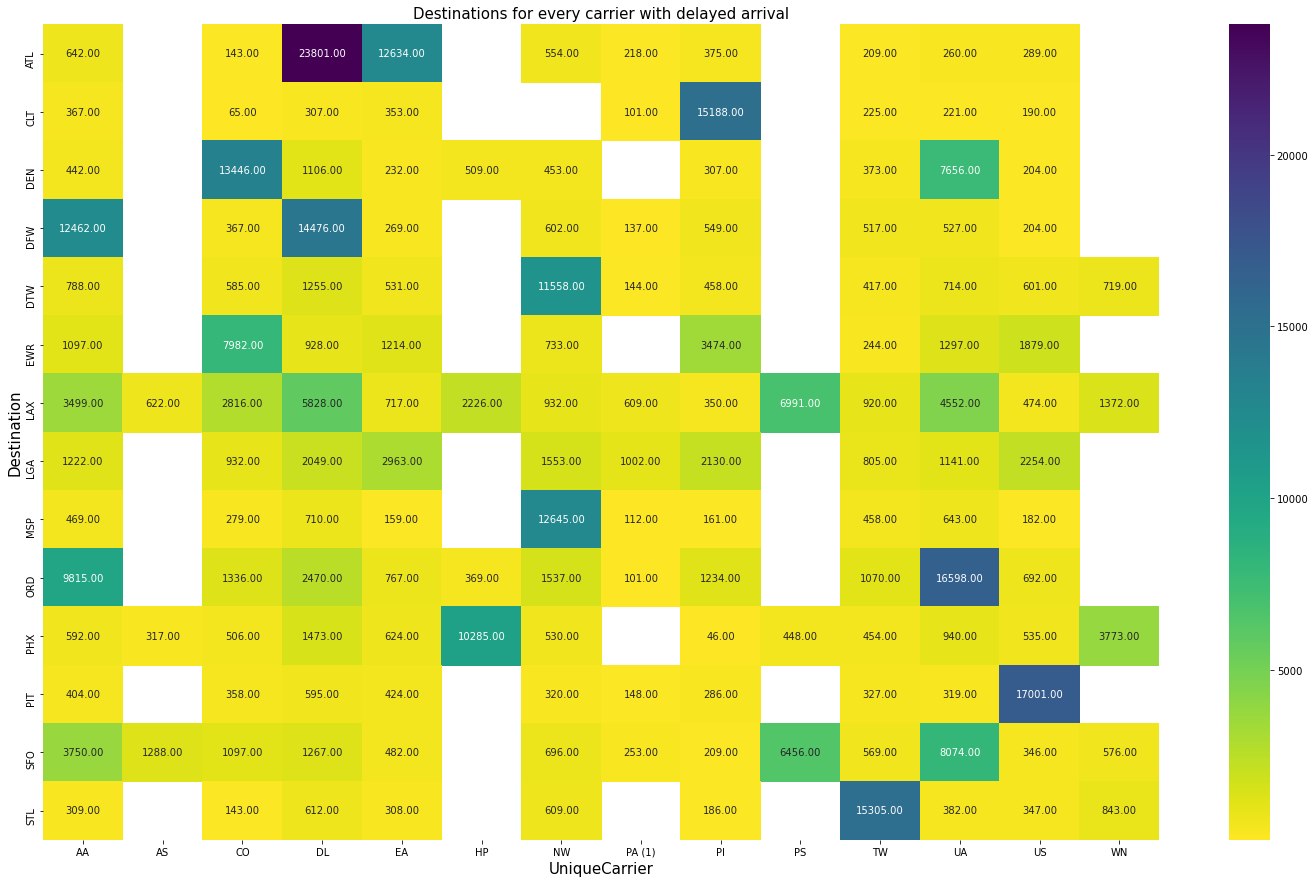

In [61]:
plt.figure(figsize = [25,15])
ad_counts = newarrdelay.groupby(['Dest','UniqueCarrier']).size()
ad_counts = ad_counts.reset_index(name='count')
ad_counts = ad_counts.pivot(index = 'Dest', columns = 'UniqueCarrier', values = 'count')
ad_counts=ad_counts[:30]
sb.heatmap(ad_counts,annot = True, fmt = '.2f',cmap='viridis_r')
plt.title('Destinations for every carrier with delayed arrival',size=15)
plt.ylabel('Destination',size=15)
plt.xlabel('UniqueCarrier',size=15);

### <p style="color:green"> * Here we see high delayed departure for every carrier by destinations, We can see from here another picture of the concentration of delays in certain destinations and for a specific carrier.

> ### * Plotting Destinations for every carrier with delayed departure.

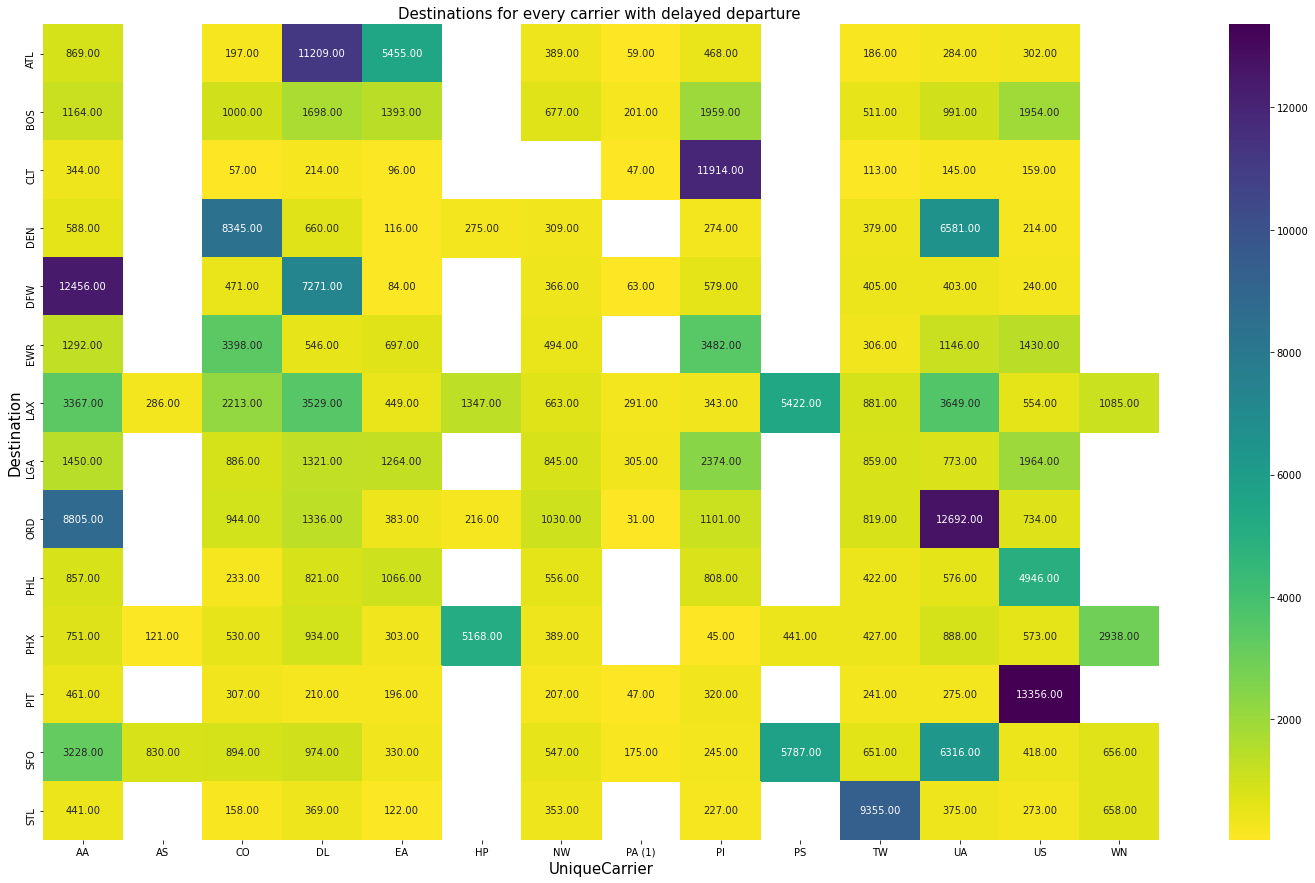

In [62]:
plt.figure(figsize = [25,15])
ad_counts = newdepdelay.groupby(['Dest','UniqueCarrier']).size()
ad_counts = ad_counts.reset_index(name='count')
ad_counts = ad_counts.pivot(index = 'Dest', columns = 'UniqueCarrier', values = 'count')
ad_counts=ad_counts[:30]
sb.heatmap(ad_counts,annot = True, fmt = '.2f',cmap='viridis_r')
plt.title('Destinations for every carrier with delayed departure ',size=15)
plt.ylabel('Destination',size=15)
plt.xlabel('UniqueCarrier',size=15);

> ### <p style="color:green"> * Here I display new plotting which include Frequency of destination for delayed departure flights for each carrier, and it show that, delay is concentrated to certain destinations and carriers as we said before, and that answerring for the question which I added.

## * Plottimg the relationship between arrival time and departure time for every carrier in each month.

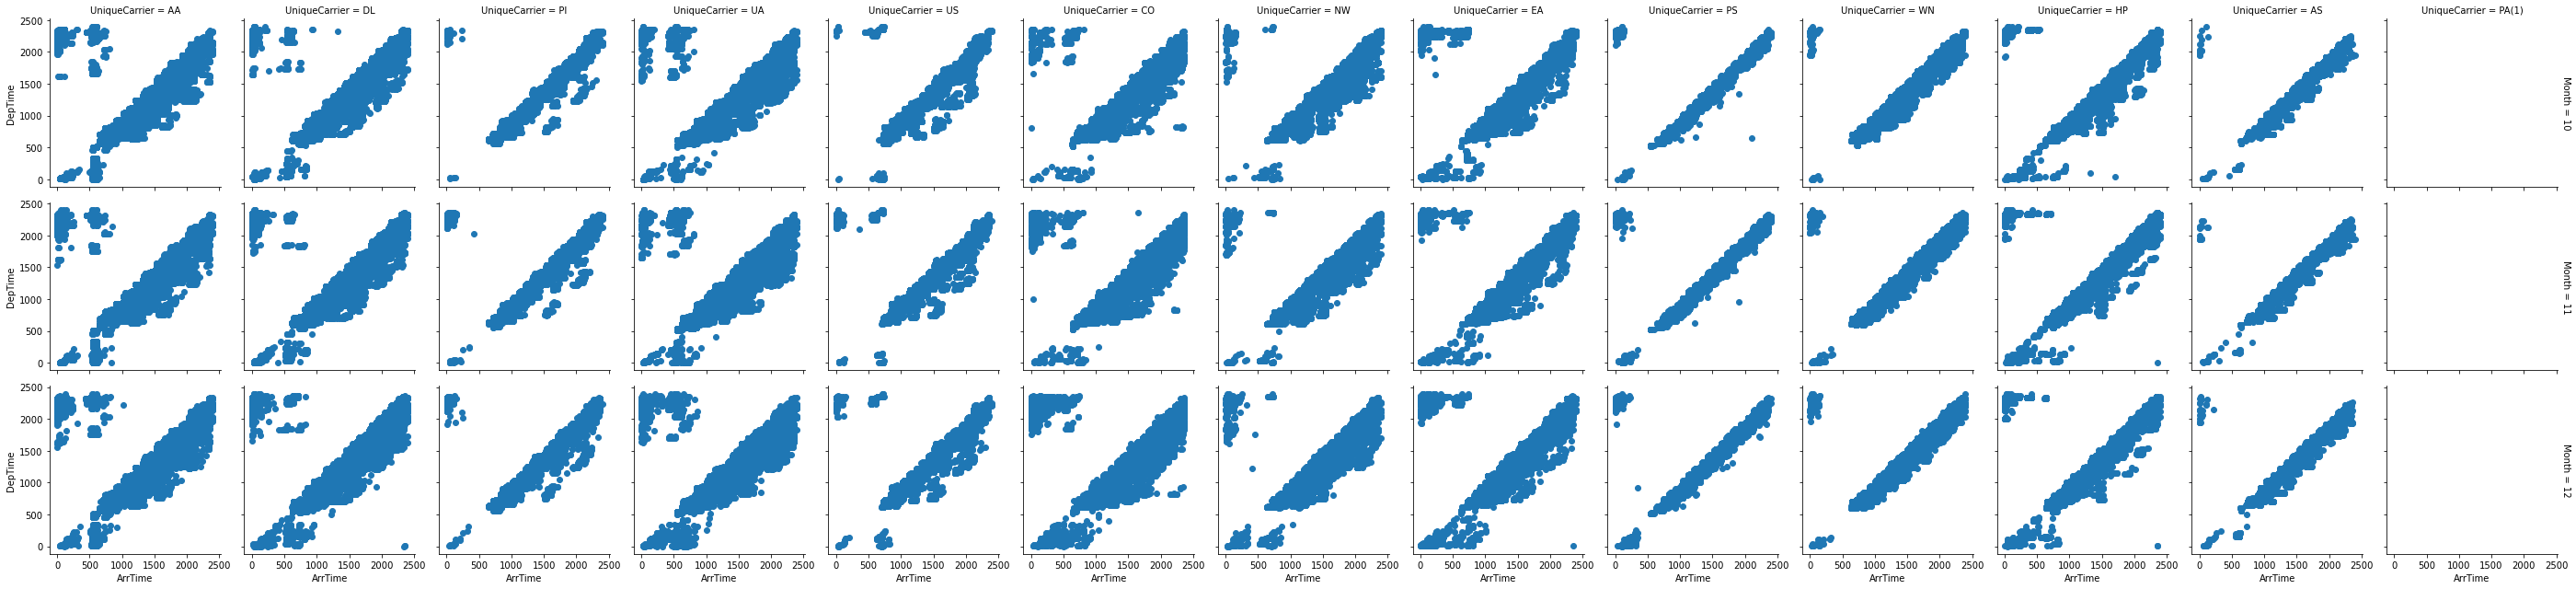

In [63]:
g=sb.FacetGrid(data=df,col='UniqueCarrier',row='Month',margin_titles=True)
g.map(plt.scatter,'ArrTime','DepTime');

## * we see strong positive correlation between arrival time and departure time.

### Limitation:
> ### <p style="color:green"> * Columns which include delay reason are empty so i can't determine kind of delay.

# Conclution:
> ### <p style="color:green"> * I found that there was a strong relationship between cancellation cases and certain original city, destinations and carriers,also the same strong relationship between dealyed and the there items 'original city, destinations and carriers,that's answering for first question.
> ### <p style="color:green"> * As weather column empty of data so I can't be sure if weather effect on cancel and delay cases but we know bad weather has strong relation on aviation traffic,in the same time december has the highest count of cancelled and delayed flights and that maybe becouse of weather.
> ### <p style="color:green"> * There is certain month has the high count of cancelled and delayed flights as we see it's December.